In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
df = pandas.read_csv('data/MLTempDataset1.csv')
df.head

<bound method NDFrame.head of       Unnamed: 0             Datetime  Hourly_Temp
0              0  2022-01-04 00:00:00       20.867
1              1  2022-01-04 01:00:00       21.000
2              2  2022-01-04 02:00:00       20.867
3              3  2022-01-04 03:00:00       20.650
4              4  2022-01-04 04:00:00       20.400
...          ...                  ...          ...
7051        7051  2022-10-24 19:00:00       25.567
7052        7052  2022-10-24 20:00:00       25.183
7053        7053  2022-10-24 21:00:00       24.600
7054        7054  2022-10-24 22:00:00       23.986
7055        7055  2022-10-24 23:00:00       23.383

[7056 rows x 3 columns]>

In [2]:
#df['Date'] = pandas.to_datetime(df['Date'], format = "%Y-%m-%d")
#df.set_index('Date', inplace = True)
#df.head

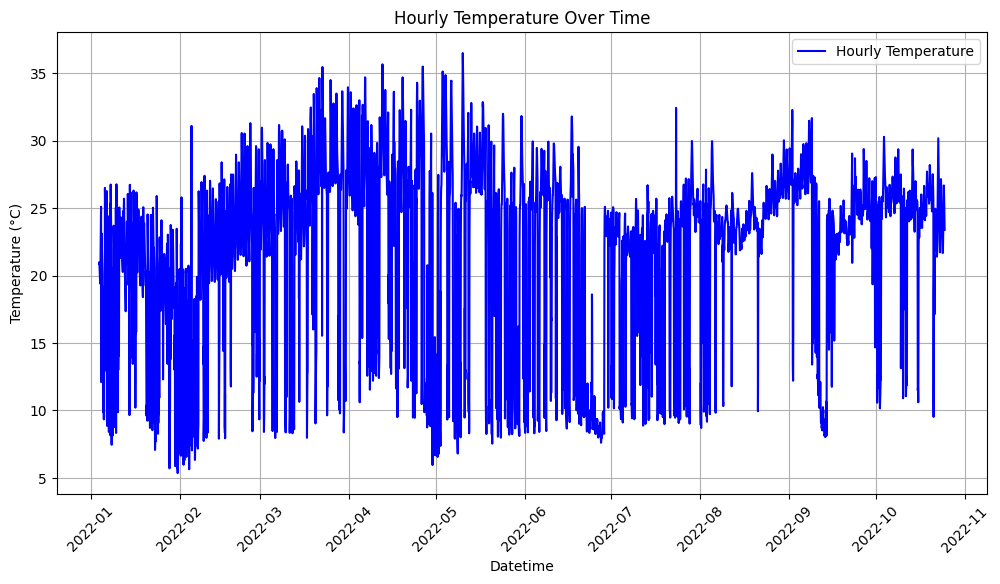

In [3]:
df['Datetime'] = pandas.to_datetime(df['Datetime'])

# Plot Hourly_Temp vs Datetime
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Hourly_Temp'], label='Hourly Temperature', color='b')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Hourly Temperature Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [17]:
y = df["Hourly_Temp"]
trainy = df["Hourly_Temp"].iloc[:-300]
testy = df["Hourly_Temp"].iloc[-300:]

In [ ]:
model = SARIMAX(trainy, order=(30, 1, 1), seasonal_order=(0, 1, 1, 4))
model_fit = model.fit()

In [40]:
forecast = model_fit.forecast(steps=300)
forecast

6756    24.640711
6757    23.760520
6758    22.738402
6759    22.196158
6760    21.760664
          ...    
7051    23.922889
7052    23.801068
7053    23.769691
7054    23.689008
7055    23.659012
Name: predicted_mean, Length: 300, dtype: float64

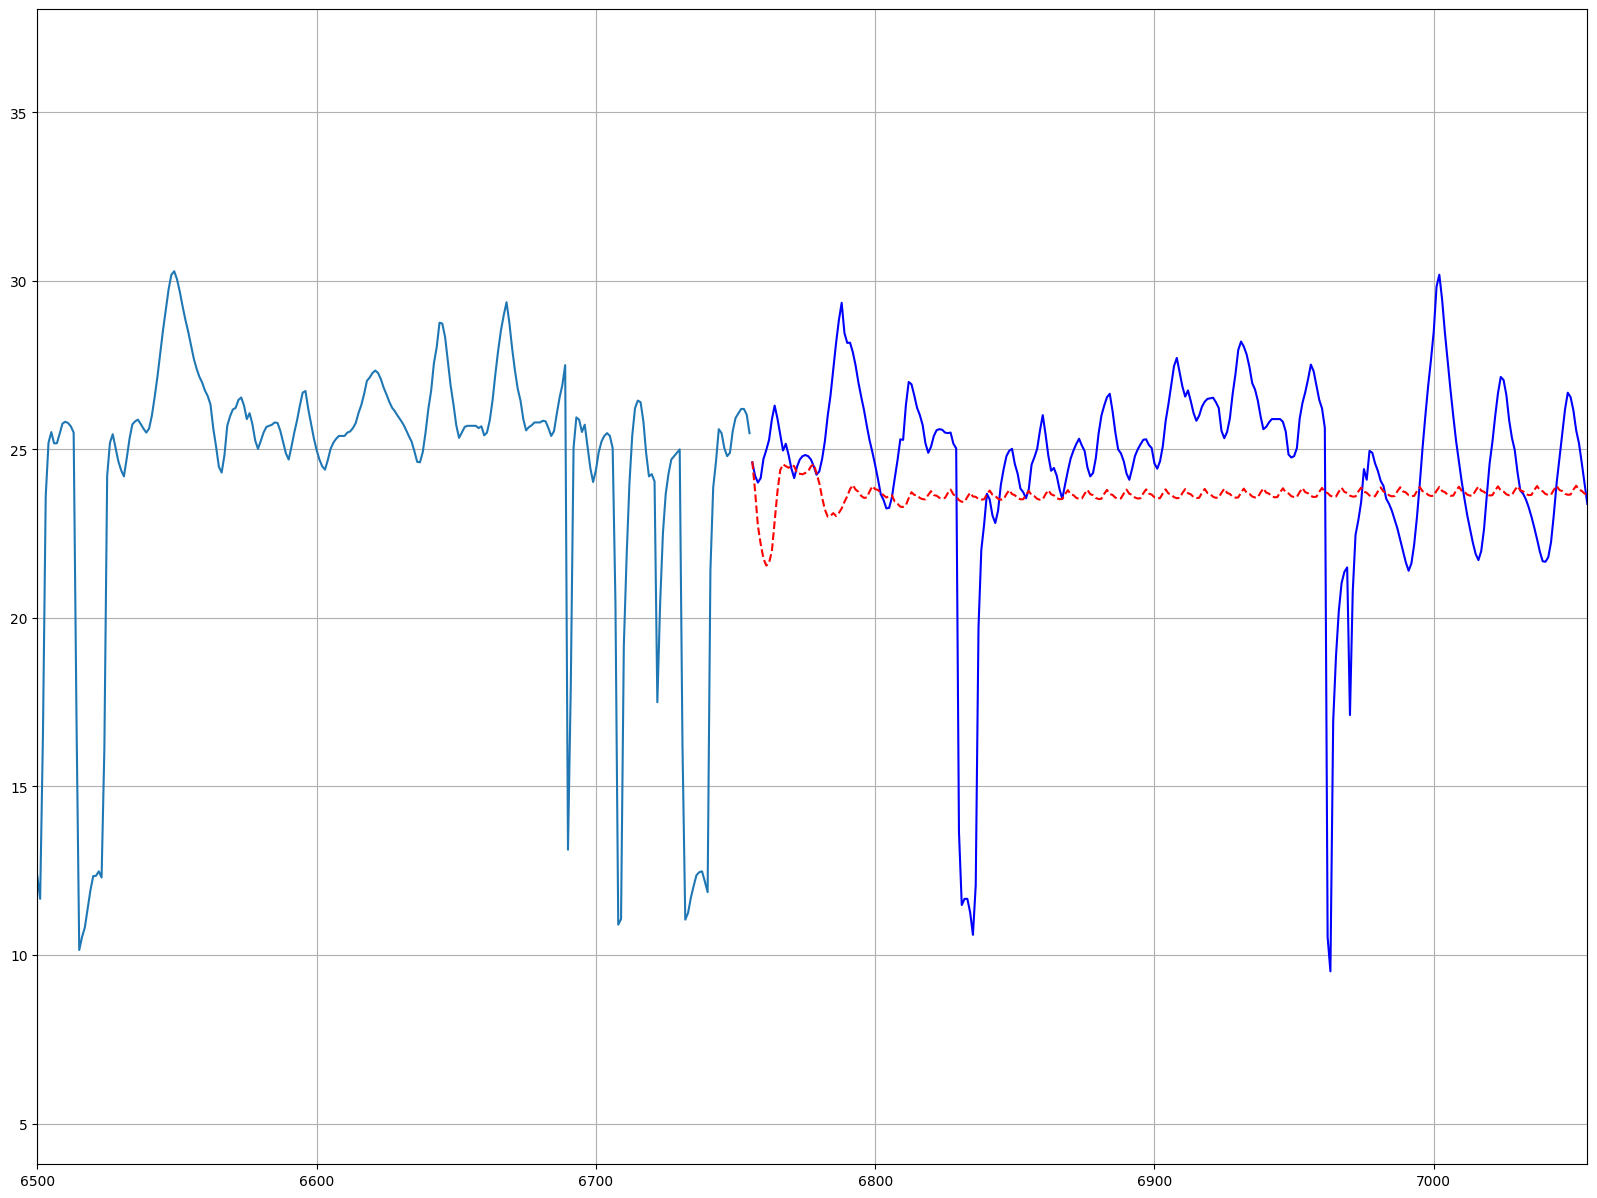

In [42]:
plt.figure(figsize = (20,15))
plt.xlim(6500, testy.index[-1])
plt.plot(trainy.index,trainy.values)
#plt.plot(test.index,test.values)
#plt.plot(test.index,forecast.values)
plt.plot(testy.index, testy, label="Actual", color='blue')
plt.plot(testy.index, forecast, label="Forecast", color='red', linestyle='dashed')
plt.grid()
plt.show()

In [16]:
model2 = auto_arima(trainy,seasonal=True, m=5)

C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025

KeyboardInterrupt: 

In [ ]:
predictions  = pandas.Series(model2.predict(n_periods = 700, X = testy))


In [ ]:
trainy.plot()
testy.plot()
predictions.plot()
plt.xlim(6000, test.index[-1])

In [ ]:
print(testx.head())  # Check if features have variability
print(testx.describe()) 
